## - - - - - - - - - - - - - - - - - - - Project - - - - - - - - - - - - - - - - - - -
# Sentimental Analysis of Twitter data using API:

---


### Pratik Patil - 202118023
Subject: Python Programming (IT606)

Course Instructor: Nishith Kotak

F.Y. M.Sc Data Science, 2021 Batch

DA-IICT

---



---



## Description:

"Sentiment analysis is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information."

In short, we can say that **Sentimental Analysis is the Process of detecting positive or negative sentiments in text.**

In this Project I have done the detailed Sentimental Analysis of Twitter data, on any Keyword (Person/Topic) given by the user.

This is a detailed exploratory analysis which uses Twitter API for extracting data and then getting inference of public sentiment on any given Topic/Person.

# Importing Libraries and Initializing the Twitter API:
In this section I installed and Imported various libraries required for this analysis.
Thereafter, setting up the Twitter API credentials using the 'tweepy' library.

The usage of each library is listed below with comments.

In [ ]:
# Install Libraries:
!pip install textblob   # Library for analyzing textual data and performing Sentimental analysis.
!pip install tweepy     # Package for conveniently accessing Twitter API with Python.

# Import Libraries:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re               # Library for matching Regular Expressions & recognize pattern.
import string           # Module for string operations.
import nltk             # Natural Language Tool Kit.
nltk.download('vader_lexicon')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS                    # Library for Wordcloud.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from PIL import Image   # Python Image Library.
from sklearn.feature_extraction.text import CountVectorizer   # Library to convert words to vectors.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Twitter API Credentials:
consumerKey = "zCx0JaM9CiSgcpCZNNXa8ikLU"
consumerSecret = "83bFGYWq2WSyIqaKuUUoLuhxxwDZrlyrGefhVUhlSQUdmV6j4n"
accessToken = "2866887739-phJN9WUSO09XFVgOl8Xi7AF4IAxo6H1Duiwuad9"
accessTokenSecret = "GacIaF05S54y48jWebeJ7wqWA4luoUB4hDfpnqbL9cJgs"

# Authentication of Twitter API:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

# Creating API object:
api = tweepy.API(auth, wait_on_rate_limit=True)

# Extracting Tweets from the API:
In this section, the tweets were extracted from Twitter API.

I used the OAuthHandler command from Tweepy library for getting 'Open Authentication' to the API.

The extracted tweets were converted into DataFrames for further analysis.

In [ ]:
# Extracting a specific number of tweets on a given person or a given topic for analysis:

keyword = input('Please enter your desired Person/Topic: ')
tweet_no = int(input('Please enter how many tweets to analyze: '))

Please enter your desired Person/Topic: virat kohli
Please enter how many tweets to analyze: 2500


In [ ]:
# Extracting the Tweets in an object:
tweets = tweepy.Cursor(api.search, q = keyword, lang = 'en').items(tweet_no)

# Appending all tweets in a List:
tweet_list = []
for tweet in tweets:
  tweet_list.append(tweet.text)
tweet_list_df = pd.DataFrame(tweet_list)   # Converting to dataframe.
  
# Printing the 5 recent tweets:
print(tweet_list_df.head(5))

                                                   0
0  RT @PunjabKingsIPL: What do you think about th...
1  @BreatheKohli Virat kohli is the name ...and g...
2  RT @CricCrazyJohns: Virat Kohli can't believe ...
3  RT @WasimJaffer14: Virat Kohli entering the dr...
4  RT @CSKFansArmy: Highest Earning Player in IPL...


In [ ]:
# Finding the Number of Tweets for different Polarity (Positive, Negative, Neutral)
tweets = tweepy.Cursor(api.search, q = keyword, lang = 'en').items(tweet_no)
positive = 0
negative = 0
neutral = 0
polarity = 0

# Creating empty list:
positive_list = []
negative_list = []
neutral_list = []
for tweet in tweets:
  analysis = TextBlob(tweet.text)                                          # Using Textblob for finding polarity
  sent_score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)    # Using NLTK for finding sentiment
  neg = sent_score['neg']
  neu = sent_score['neu']
  pos = sent_score['pos']
  comp = sent_score['compound']
  polarity += analysis.sentiment.polarity

  # Appending the number of Positive, Negative and Neutral Tweets in separate lists:
  if pos > neg:
    positive_list.append(tweet.text)
    positive += 1
  elif neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1

# Printing the Number of Tweets for different Polarity:
positive_df = pd.DataFrame(positive_list)
negative_df = pd.DataFrame(negative_list)
neutral_df = pd.DataFrame(neutral_list)
print('Total number of Tweets: ', len(tweet_list_df))
print('Total number of Positive Tweets: ', len(positive_df))
print('Total number of Negative Tweets: ', len(negative_df))
print('Total number of Neutral Tweets: ', len(neutral_df))

Total number of Tweets:  2500
Total number of Positive Tweets:  831
Total number of Negative Tweets:  520
Total number of Neutral Tweets:  1149


In [ ]:
# Defining a function for calculating Percentage:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

# Converting Polarity details into Percentage:
positive_percent = percentage(positive, tweet_no)
negative_percent = percentage(negative, tweet_no)
neutral_percent = percentage(neutral, tweet_no)
polarity_percent = percentage(polarity, tweet_no)

# Formating the data into Percentage:
positive_percent = format(positive_percent, '.1f')      # Here .1f is 1 digit of precision after the floating point.
negative_percent = format(negative_percent, '.1f')
neutral_percent = format(neutral_percent, '.1f')

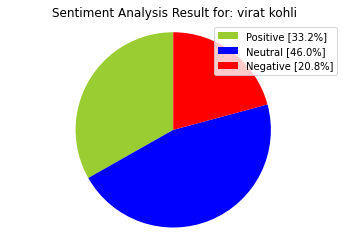

In [ ]:
# Creating Pie Chart:
labels = ['Positive ['+str(positive_percent)+'%]' , 'Neutral ['+str(neutral_percent)+'%]','Negative ['+str(negative_percent)+'%]']
sizes = [positive_percent, neutral_percent, negative_percent]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for: ' + keyword)
plt.axis('equal')
plt.show()

# Data cleaning for further analysis:
Cleaning the Tweets for Hashtags, tags, Retweets and other symbols and removing duplicate Tweets.

In [ ]:
# Cleaning Text (Retweets, Tags, Punctuation, etc.)
# Creating new dataframe and new features:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

# Removing Retweets, Punctuation, etc:
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)       # Replace particular substring with another substring.
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)      # Using re library to remove a set of values.
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()

# Removing Duplicate Tweets:
tw_list.drop_duplicates(inplace = True)

# Displaying 10 cleaned tweets:
tw_list.head(10)

,0,text
0,RT @PunjabKingsIPL: What do you think about th...,what do you think about that virat kohli dism...
1,@BreatheKohli Virat kohli is the name ...and g...,virat kohli is the name and great come ba...
2,RT @CricCrazyJohns: Virat Kohli can't believe ...,virat kohli can t believe the decision as eve...
3,RT @WasimJaffer14: Virat Kohli entering the dr...,virat kohli entering the dressing room after ...
4,RT @CSKFansArmy: Highest Earning Player in IPL...,highest earning player in ipl history 2008 ...
5,RT @WasimJaffer14: That was bat first in my op...,that was bat first in my opinion and i under...
7,RT @man4_cricket: Seriously. This is not out. ...,seriously this is not out very unlucky vira...
8,RT @Kohli4ever: Virat Kohli's dismissal 2017 v...,virat kohli s dismissal 2017 vs 2021 no impr...
9,RT @ViratGang: You Got To Feel For Virat Kohli...,you got to feel for virat kohli it seeme...
11,RT @ComeOnCricket: Toss Win% of Test Captains ...,toss win of test captains with 30 games at ...


# Analysis using NLTK and TextBlob:
## NLTK:
The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

## TextBlob:
TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. The sentiment function of textblob returns two properties, polarity, and subjectivity.



---


Overall these two libraries are the most basic and commonly used tool for performing sentimental analysis or for soving any other Natural Language Processing problems

In [ ]:
# Calculating Negative, Positive, Neutral and Compound values for individual Tweet:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))    # Getting Polarity and Subjectivity using TextBlob
for index, row in tw_list['text'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)     # Finding indiviodual sentiment using NLTK
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = "positive"
  else:
    tw_list.loc[index, 'sentiment'] = "neutral"
  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

tw_list.head(10)        # Printing head of the DataFrame

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @PunjabKingsIPL: What do you think about th...,what do you think about that virat kohli dism...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,@BreatheKohli Virat kohli is the name ...and g...,virat kohli is the name and great come ba...,0.122857,0.350000,positive,0.000,0.823,0.177,0.6249
2,RT @CricCrazyJohns: Virat Kohli can't believe ...,virat kohli can t believe the decision as eve...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @WasimJaffer14: Virat Kohli entering the dr...,virat kohli entering the dressing room after ...,0.500000,0.750000,positive,0.000,0.746,0.254,0.5267
4,RT @CSKFansArmy: Highest Earning Player in IPL...,highest earning player in ipl history 2008 ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @WasimJaffer14: That was bat first in my op...,that was bat first in my opinion and i under...,0.250000,0.333333,neutral,0.000,1.000,0.000,0.0000
7,RT @man4_cricket: Seriously. This is not out. ...,seriously this is not out very unlucky vira...,-0.066667,0.483333,negative,0.159,0.841,0.000,-0.1779
8,RT @Kohli4ever: Virat Kohli's dismissal 2017 v...,virat kohli s dismissal 2017 vs 2021 no impr...,-0.125000,0.850000,positive,0.164,0.597,0.239,0.4588
9,RT @ViratGang: You Got To Feel For Virat Kohli...,you got to feel for virat kohli it seeme...,0.250000,0.333333,neutral,0.000,1.000,0.000,0.0000
11,RT @ComeOnCricket: Toss Win% of Test Captains ...,toss win of test captains with 30 games at ...,0.800000,0.400000,positive,0.000,0.847,0.153,0.5859


In [ ]:
# Getting Polarity for Individual Tweets:
pol_check = tw_list[['text','polarity']]
pol_check.head(10)

,text,polarity
0,what do you think about that virat kohli dism...,0.000000
1,virat kohli is the name and great come ba...,0.122857
2,virat kohli can t believe the decision as eve...,0.000000
3,virat kohli entering the dressing room after ...,0.500000
4,highest earning player in ipl history 2008 ...,0.000000
5,that was bat first in my opinion and i under...,0.250000
7,seriously this is not out very unlucky vira...,-0.066667
8,virat kohli s dismissal 2017 vs 2021 no impr...,-0.125000
9,you got to feel for virat kohli it seeme...,0.250000
11,toss win of test captains with 30 games at ...,0.800000


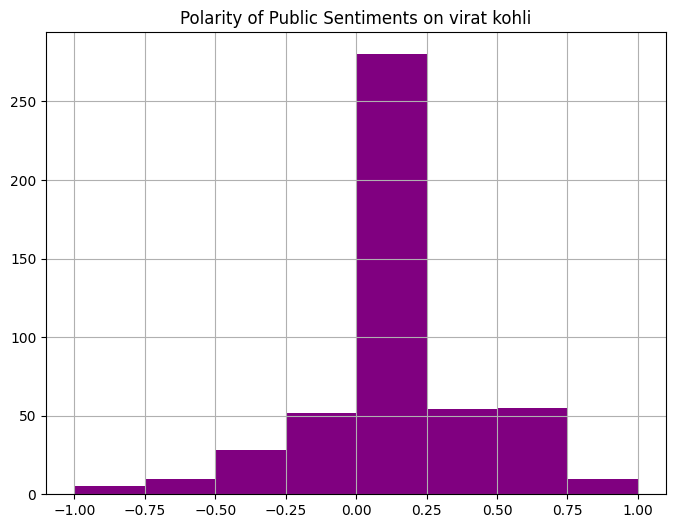

In [ ]:
# Plotting Bar graph for visualizing the distribution of Polarity:
fig, ax = plt.subplots(figsize = (8,6))
pol_check.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
                    ax=ax, color = 'purple')
plt.title('Polarity of Public Sentiments on ' + keyword)
plt.show()

In [ ]:
# Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_positive = tw_list[tw_list['sentiment'] == 'positive']
tw_list_negative = tw_list[tw_list['sentiment'] == 'negative']
tw_list_neutral = tw_list[tw_list['sentiment'] == 'neutral']

In [ ]:
# Function for count_values_in single columns for the sentiments:

def count_values_in_column(data,feature):
  total = data.loc[:,feature].value_counts(dropna = False)
  percentage = round(data.loc[:,feature].value_counts(dropna = False, normalize = True)*100,2)
  return pd.concat([total,percentage], axis=1, keys=['Total', 'Percentage'])


# Count_values for sentiment of the cleaned data:
count_values_in_column(tw_list, 'sentiment')

,Total,Percentage
neutral,192,38.87
positive,169,34.21
negative,133,26.92


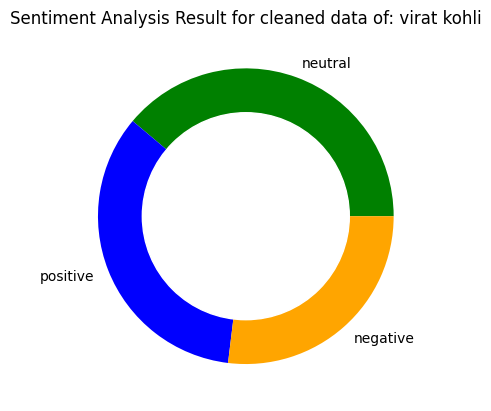

In [ ]:
# Visualizing the cleaned data:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size = pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','orange'])
plt.title('Sentiment Analysis Result for cleaned data of: ' + keyword)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
# Function to Create Wordcloud:

def create_wordcloud(text):
  mask = np.array(Image.open('cloud.png'))
  stopwords = set(STOPWORDS)
  wc = WordCloud(background_color='white',
                 mask = mask,
                 max_words = 3000,
                 stopwords = stopwords,
                 repeat = True)
  wc.generate(str(text))
  wc.to_file('wc.png')
  print('Word Cloud Saved Successfully')
  path = 'wc.png'
  display(Image.open(path))

Word Cloud Saved Successfully


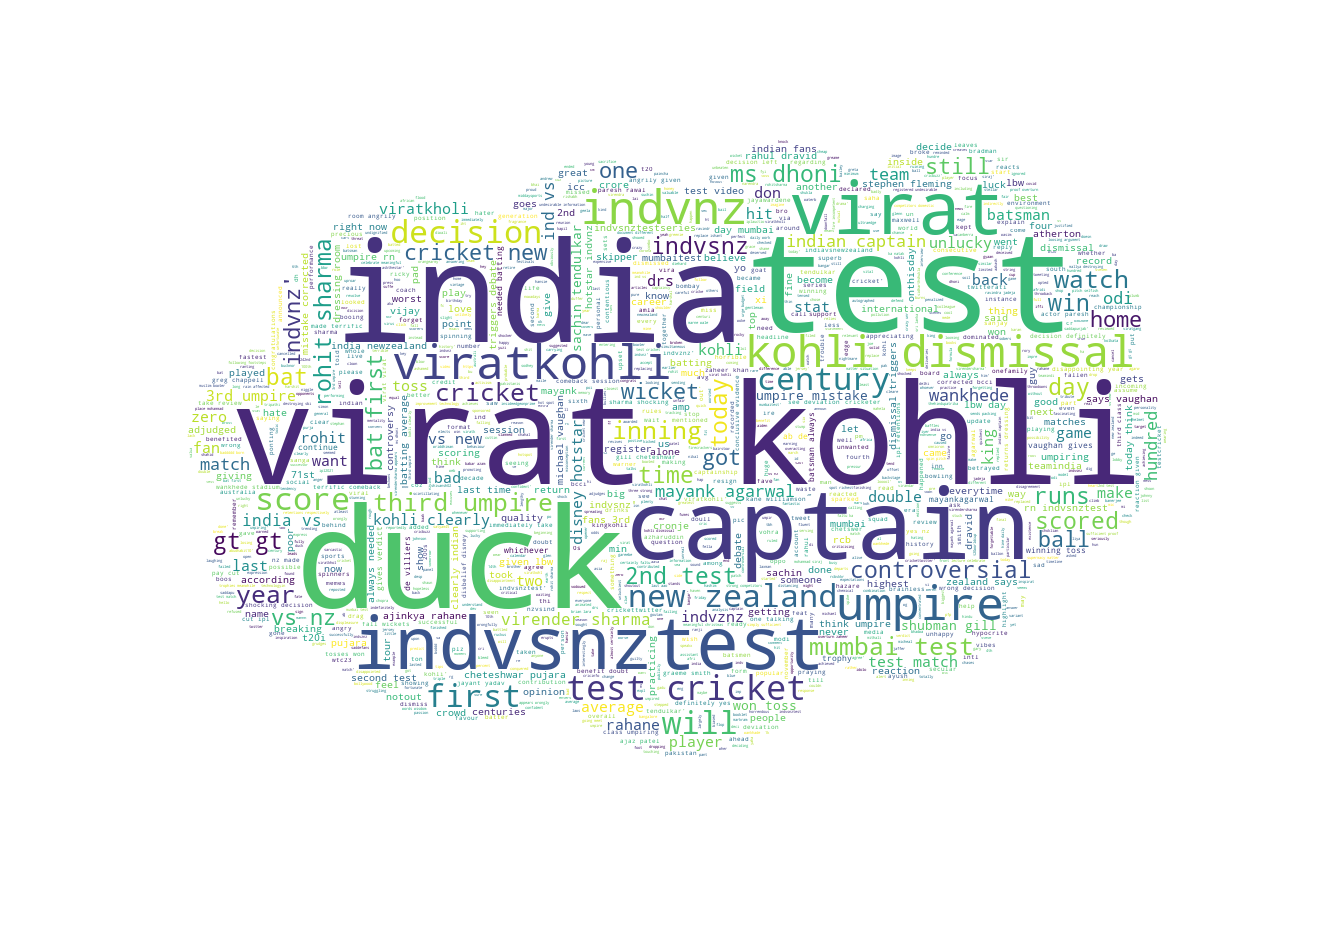

In [ ]:
# Creating wordcloud for all tweets
create_wordcloud(tw_list['text'].values)

Word Cloud Saved Successfully


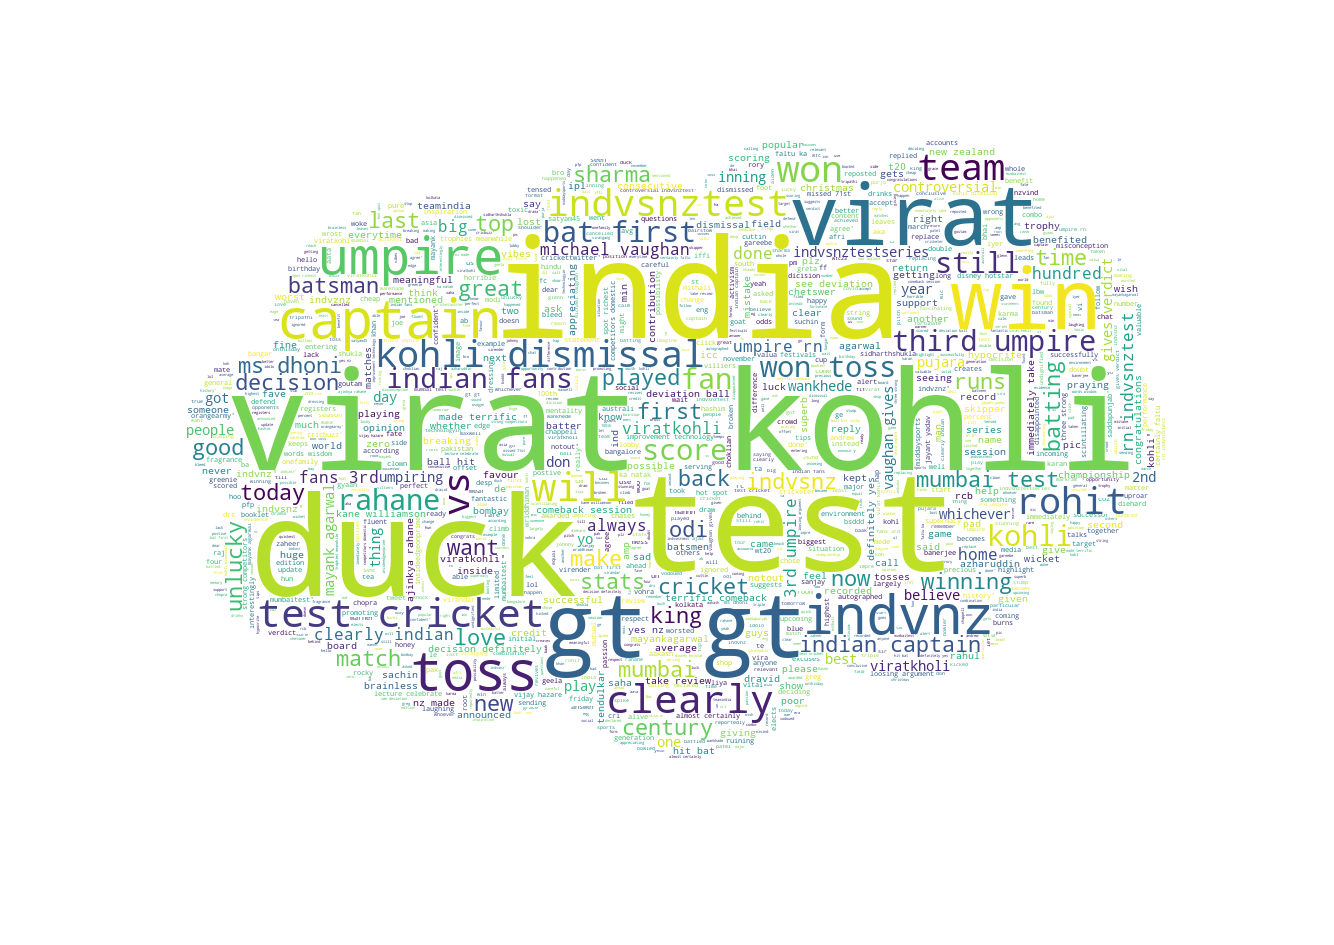

In [ ]:
# Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


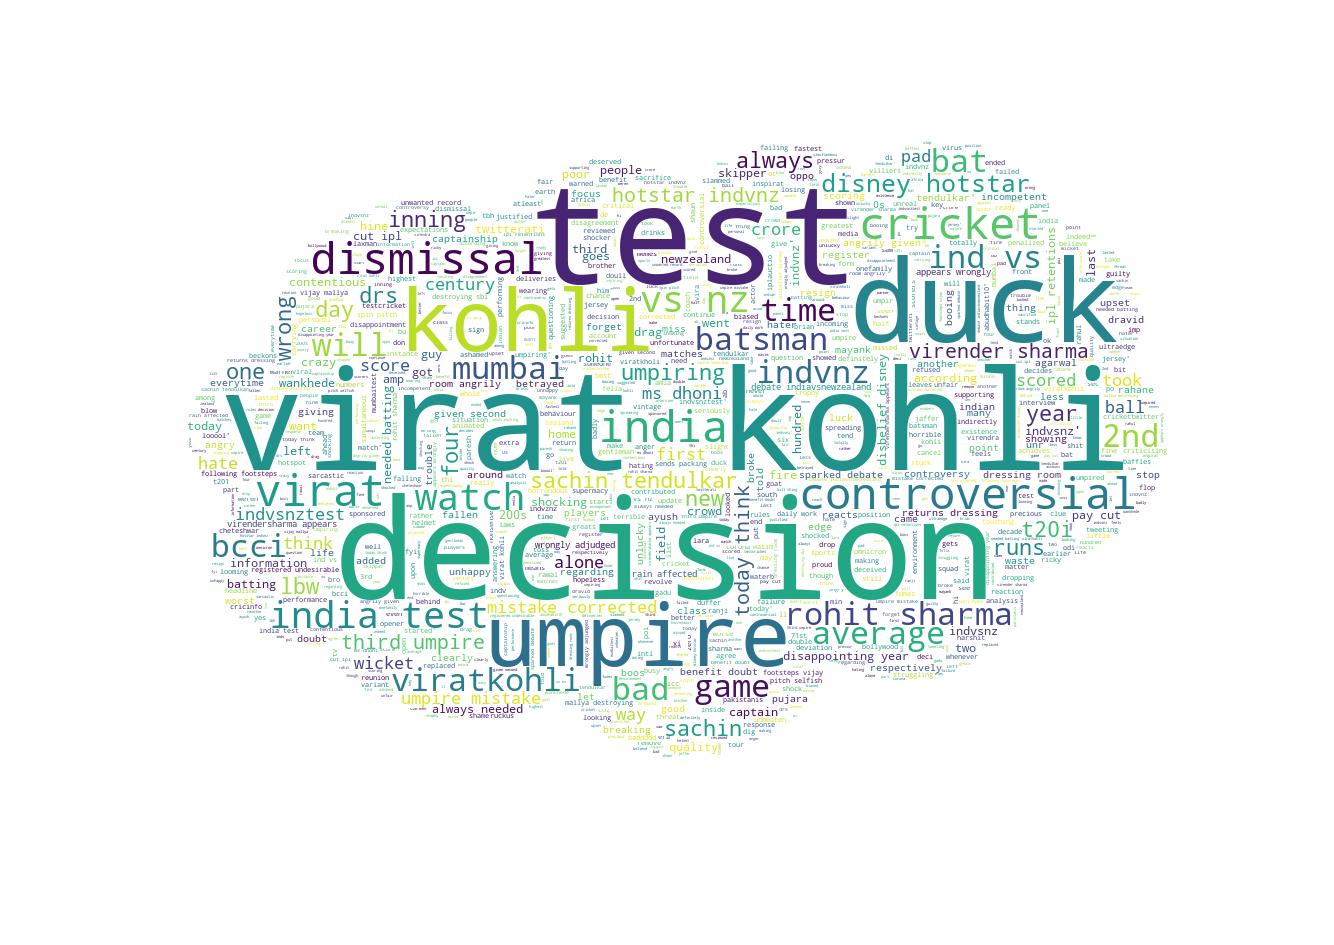

In [ ]:
# Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


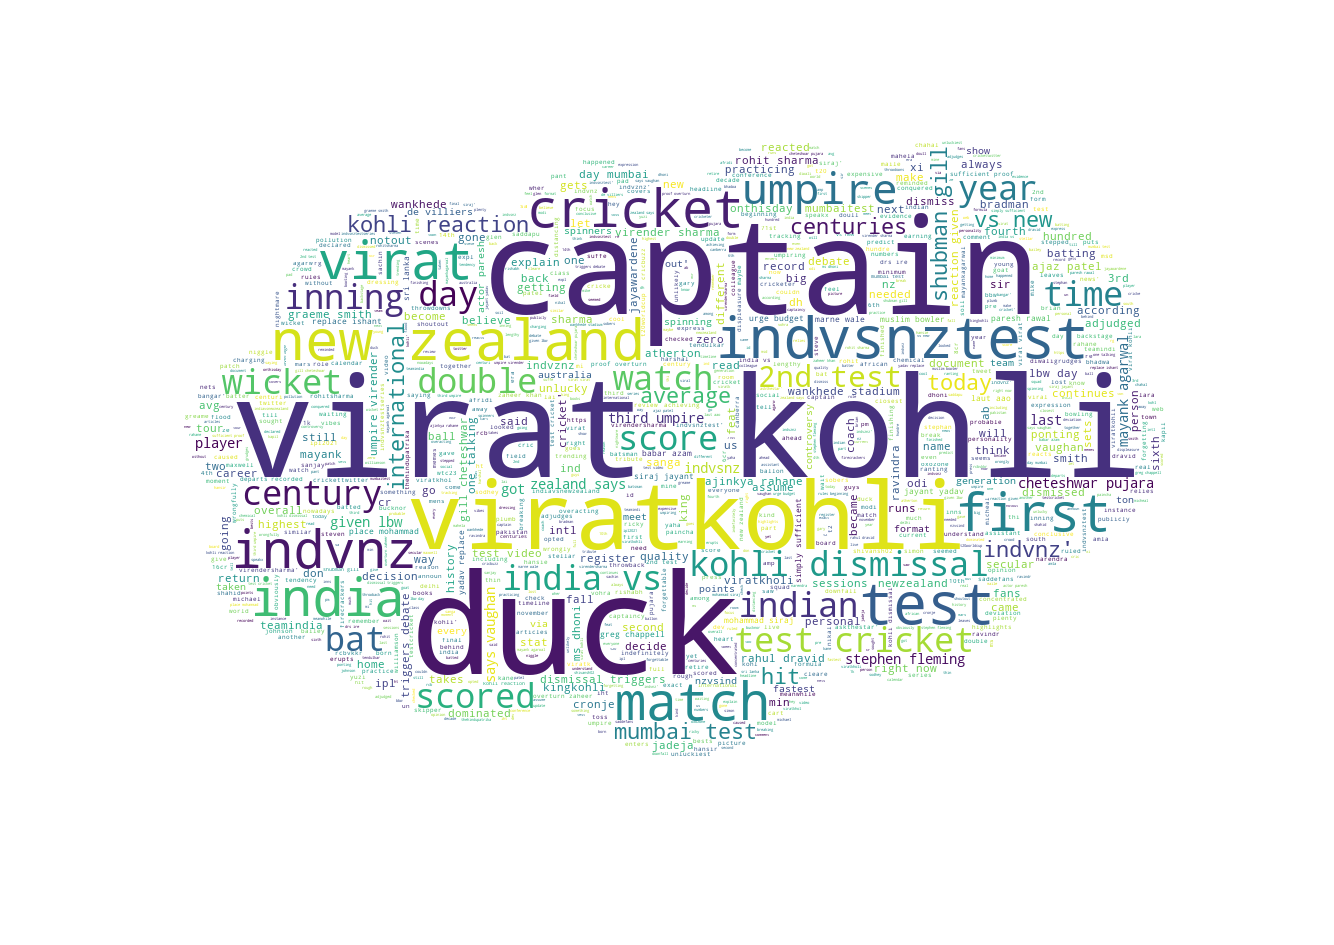

In [ ]:
# Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
# Calculating average tweet's lenght and word count
tw_list['avg_text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['avg_text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
# Average length of Tweets:
avg_text_len = round(pd.DataFrame(tw_list.groupby("sentiment").avg_text_len.mean()),2)
avg_text_len

,avg_text_len
sentiment,
negative,101.42
neutral,92.77
positive,101.88


In [ ]:
# Average word count per tweet:
avg_word_count = round(pd.DataFrame(tw_list.groupby("sentiment").avg_text_word_count.mean()),2)
avg_word_count

,avg_text_word_count
sentiment,
negative,17.55
neutral,15.41
positive,17.52


Text(0.5, 1.0, 'Average word count per sentiment')

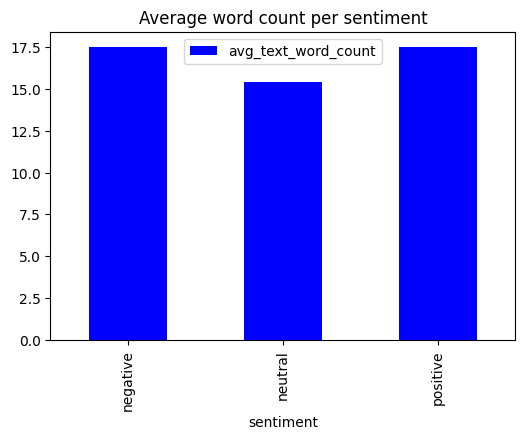

In [ ]:
# Plotting Bar chart:
avg_word_count.plot(kind = 'bar', figsize = [6,4], color ='blue')
plt.title('Average word count per sentiment')

## Applying Tokenization, Stemmer, removing Stopwords and applying Countvectorizer:
*Tokenization: Tokenization is the process of breaking text documents apart into those pieces. In text analytics, tokens are most frequently just words.

*Stemmer: Stemming is the process of reducing a word to its root form. This ensures variants of a word match during a search. For example, walking and walked can be stemmed to the same root word: walk.

*Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence.

*Countvectorizer: What is CountVectorizer in Python?
CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [ ]:
# Removing Punctuation:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
# Appliyng tokenization:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
# Removing stopwords:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
# Appliyng Stemmer: 
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
# Cleaning Text:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove punctuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head(5)   # Printing head of DataFrame.

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,avg_text_len,avg_text_word_count,punct,tokenized,nonstop,stemmed
0,RT @PunjabKingsIPL: What do you think about th...,what do you think about that virat kohli dism...,0.000000,0.00,neutral,0.0,1.000,0.000,0.0000,121,20,what do you think about that virat kohli dism...,"[, what, do, you, think, about, that, virat, k...","[, think, virat, kohli, dismissal, saddefans, ...","[, think, virat, kohli, dismiss, saddefan, let..."
1,@BreatheKohli Virat kohli is the name ...and g...,virat kohli is the name and great come ba...,0.122857,0.35,positive,0.0,0.823,0.177,0.6249,114,20,virat kohli is the name and great come ba...,"[, virat, kohli, is, the, name, and, great, co...","[, virat, kohli, name, great, come, back, odds...","[, virat, kohli, name, great, come, back, odd,..."
2,RT @CricCrazyJohns: Virat Kohli can't believe ...,virat kohli can t believe the decision as eve...,0.000000,0.00,neutral,0.0,1.000,0.000,0.0000,54,9,virat kohli can t believe the decision as eve...,"[, virat, kohli, can, t, believe, the, decisio...","[, virat, kohli, believe, decision, everyone, ]","[, virat, kohli, believ, decis, everyon, ]"
3,RT @WasimJaffer14: Virat Kohli entering the dr...,virat kohli entering the dressing room after ...,0.500000,0.75,positive,0.0,0.746,0.254,0.5267,74,11,virat kohli entering the dressing room after ...,"[, virat, kohli, entering, the, dressing, room...","[, virat, kohli, entering, dressing, room, win...","[, virat, kohli, enter, dress, room, win, toss..."
4,RT @CSKFansArmy: Highest Earning Player in IPL...,highest earning player in ipl history 2008 ...,0.000000,0.00,neutral,0.0,1.000,0.000,0.0000,117,18,highest earning player in ipl history ...,"[, highest, earning, player, in, ipl, history,...","[, highest, earning, player, ipl, history, cr,...","[, highest, earn, player, ipl, histori, cr, ro..."


In [ ]:
# Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])              # Doing required calculations without transforming the data.
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

494 Number of reviews has 1097 words


In [ ]:
# Counting how many times each word occurs (converted to categorical data):
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aakash,aao,aata,ab,abl,abudhabit,accept,accord,account,achiev,activ,actor,ad,adjudg,affect,afri,africa,african,afridi,agarw,agre,ahead,aiden,ajaz,ajinkya,aka,al,alert,aliv,almost,alon,also,alway,amla,among,amp,analysi,andrew,anger,...,whenev,wher,whether,whichev,whoever,whole,wicket,williamson,win,wisdom,wish,without,woke,woo,word,work,world,wors,worst,would,wriddhiman,wrong,wrongli,wrost,wt,wtc,xi,yadav,yaha,ye,yeah,year,yet,yo,young,yuzi,zaheer,ze,zealand,zero
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]     # Top 10 most used words.

,0
kohli,475
virat,468
test,125
umpir,90
duck,67
india,61
cricket,60
indvnz,51
captain,48
bat,44
